In [55]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset
df = pd.read_csv("D:\\Assignments questions\\EDA2\\adult_with_headers.csv")



# ---- 1. Basic Data Exploration ----
print("First 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe(include='all'))
print("\nMissing Values:\n", df.isnull().sum())

# ---- 2. Handle Missing Values ----
# Example: drop rows with missing values
df_clean = df.dropna()

# OR: impute missing values
for col in df.select_dtypes(include=['object']).columns:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)  # categorical → mode

for col in df.select_dtypes(include=['int64','float64']).columns:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)  # numerical → median

# ---- 3. Scaling Numerical Features ----
numeric_cols = df_clean.select_dtypes(include=['int64','float64']).columns

# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = df_clean.copy()
df_standard_scaled[numeric_cols] = scaler_standard.fit_transform(df_clean[numeric_cols])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df_clean.copy()
df_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(df_clean[numeric_cols])

print("\nStandard Scaled Sample:\n", df_standard_scaled[numeric_cols].head())
print("\nMin-Max Scaled Sample:\n", df_minmax_scaled[numeric_cols].head())


First 5 rows:
    age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   Unite

C:\Users\munig\AppData\Local\Temp\ipykernel_11312\419370538.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)  # categorical → mode
C:\Users\munig\AppData\Local\Temp\ipykernel_11312\419370538.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [56]:
# One-Hot Encode categorical columns with < 5 unique values
df_encoded = pd.get_dummies(df, 
                            columns=[col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() < 5])

print(df_encoded.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Female  \
0          2174             0              40   United-States        False   
1             0             0         

In [57]:
# Select categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding only for columns with more than 5 unique categories
le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() > 5:   # more than 5 categories
        df[col] = le.fit_transform(df[col].astype(str))

print(df.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship    race      sex  capital_gain  capital_loss  \
0           1             1   White     Male          2174             0   
1           4             0   White     Male             0             0   
2           6             1   White     Male             0             0   
3           6             0   Black     Male             0             0   
4          10             5   Black   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1              13           

In [58]:
'''One-Hot Encoding
Pros:
No numeric order assumed between categories (avoids confusion).
Works well with algorithms like Logistic Regression, SVM, KNN.
Good for variables with few categories (e.g., Gender, Yes/No).
Cons:
Creates many new columns if categories are high → increases memory & processing time.
Can lead to sparse data (lots of zeros).'''

'One-Hot Encoding\nPros:\nNo numeric order assumed between categories (avoids confusion).\nWorks well with algorithms like Logistic Regression, SVM, KNN.\nGood for variables with few categories (e.g., Gender, Yes/No).\nCons:\nCreates many new columns if categories are high → increases memory & processing time.\nCan lead to sparse data (lots of zeros).'

In [59]:
''' Label Encoding
Pros:
Simple, fast, and keeps data compact (only one column).
Handles high-cardinality features (e.g., Occupation, Country).
Works well with tree-based models (Decision Trees, Random Forest, XGBoost).
Cons:
Adds false order (e.g., Cat=0, Dog=1, Fish=2 → model may think Fish > Dog).
Can mislead models that are sensitive to numeric relationships (like Linear/Logistic Regression).'''

' Label Encoding\nPros:\nSimple, fast, and keeps data compact (only one column).\nHandles high-cardinality features (e.g., Occupation, Country).\nWorks well with tree-based models (Decision Trees, Random Forest, XGBoost).\nCons:\nAdds false order (e.g., Cat=0, Dog=1, Fish=2 → model may think Fish > Dog).\nCan mislead models that are sensitive to numeric relationships (like Linear/Logistic Regression).'

In [60]:
df["capital_diff"] = df["capital_gain"] - df["capital_loss"]
'''Rationale:
Instead of treating capital_gain and capital_loss separately, this combines them into net capital outcome.
Example: Someone with 5000 gain and 2000 loss → capital_diff = 3000.
This gives the model a single clearer signal of financial status.'''

'Rationale:\nInstead of treating capital_gain and capital_loss separately, this combines them into net capital outcome.\nExample: Someone with 5000 gain and 2000 loss → capital_diff = 3000.\nThis gives the model a single clearer signal of financial status.'

In [61]:
df["age_group"] = pd.cut(df["age"], bins=[0, 25, 45, 65, 100], labels=["Young", "Adult", "Middle_Age", "Senior"])
'''Rationale:
Raw age may not be as informative.
Grouping into categories (Young, Adult, Middle Age, Senior) captures life stage differences.
For example, younger people may earn less due to less experience, while middle-aged individuals may have higher chances of >50K income.'''

'Rationale:\nRaw age may not be as informative.\nGrouping into categories (Young, Adult, Middle Age, Senior) captures life stage differences.\nFor example, younger people may earn less due to less experience, while middle-aged individuals may have higher chances of >50K income.'

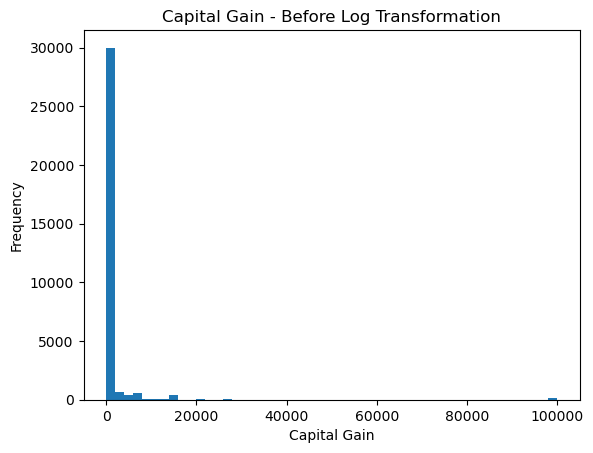

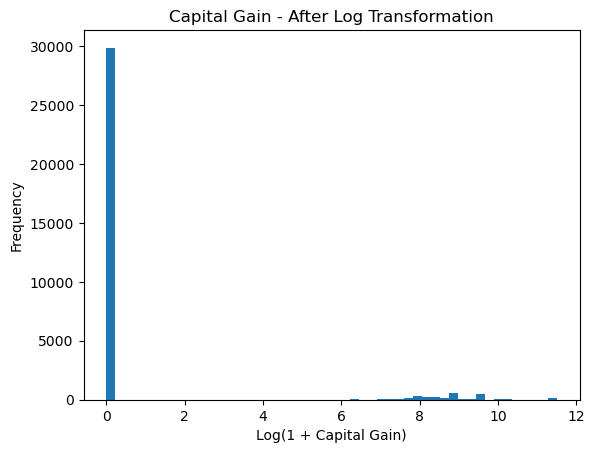

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("D:\\Assignments questions\\EDA2\\adult_with_headers.csv")

# ---- Before Transformation ----
plt.hist(df["capital_gain"], bins=50)
plt.title("Capital Gain - Before Log Transformation")
plt.xlabel("Capital Gain")
plt.ylabel("Frequency")
plt.show()

# ---- Apply Log Transformation ----
df["capital_gain_log"] = np.log1p(df["capital_gain"])   # log(x+1) handles zeros safely

# ---- After Transformation ----
plt.hist(df["capital_gain_log"], bins=50)
plt.title("Capital Gain - After Log Transformation")
plt.xlabel("Log(1 + Capital Gain)")
plt.ylabel("Frequency")
plt.show()


In [63]:
from sklearn.ensemble import IsolationForest
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Isolation Forest model
iso = IsolationForest(contamination=0.05, random_state=42)  # 5% assumed as outliers
outliers = iso.fit_predict(df[numeric_cols])

# Add result column (-1 = outlier, 1 = normal)
df["outlier_flag"] = outliers

# Remove outliers
df_clean = df[df["outlier_flag"] == 1].copy()

print("Original dataset shape:", df.shape)
print("After removing outliers:", df_clean.shape)

Original dataset shape: (32561, 17)
After removing outliers: (30933, 17)


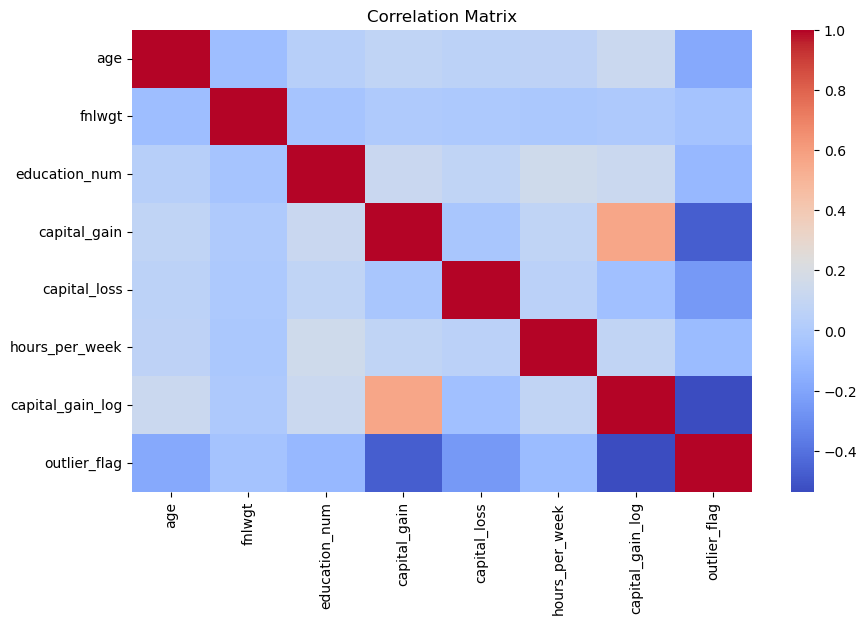

Top predictors of income (PPS-like scores):

capital_gain_log    0.805319
capital_gain        0.805319
education_num       0.779583
outlier_flag        0.779030
capital_loss        0.776604
workclass           0.763122
education           0.761033
age                 0.759190
race                0.759190
sex                 0.759190
dtype: float64


In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# ---------------- Correlation Matrix ----------------
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ---------------- PPS Matrix ----------------
# Try importing PPS, else use alternative
try:
    import ppscore as pps
    pps_matrix = pps.matrix(df)
    plt.figure(figsize=(12,8))
    sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), cmap="viridis", annot=False)
    plt.title("PPS Matrix")
    plt.show()
except ModuleNotFoundError:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import LabelEncoder

    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

    X = df_encoded.drop("income", axis=1)
    y = df_encoded["income"]

    feature_scores = {}
    for col in X.columns:
        model = DecisionTreeClassifier(max_depth=3, random_state=42)
        score = cross_val_score(model, X[[col]], y, cv=3, scoring="accuracy").mean()
        feature_scores[col] = score

    pps_like = pd.Series(feature_scores).sort_values(ascending=False)
    print("Top predictors of income (PPS-like scores):\n")
    print(pps_like.head(10))
